# Performance evaluation of Terapixel rendering in Cloud (Super)computing

In [ ]:
# !pip install sweetviz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import sweetviz as sv
import IPython

In [3]:
app_check = pd.read_csv("../data/application-checkpoints.csv")
gpu = pd.read_csv("../data/gpu.csv")
task_xy = pd.read_csv("../data/task-x-y.csv")

In [4]:
app_check.head(10)

,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
1,2018-11-08T07:42:29.842Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
2,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
3,2018-11-08T07:42:29.845Z,0d56a730076643d585f77e00d2d8521a00000N,Render,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
4,2018-11-08T07:43:13.957Z,0d56a730076643d585f77e00d2d8521a00000N,TotalRender,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,20fb9fcf-a927-4a4b-a64c-70258b66b42d
5,2018-11-08T07:43:56.239Z,0d56a730076643d585f77e00d2d8521a00000N,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71
6,2018-11-08T07:43:56.239Z,0d56a730076643d585f77e00d2d8521a00000N,Uploading,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71
7,2018-11-08T07:43:57.223Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71
8,2018-11-08T07:44:47.555Z,0d56a730076643d585f77e00d2d8521a00000N,Saving Config,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,c9e249d8-52ed-40c6-8713-b5cbf02ea87e
9,2018-11-08T07:45:20.713Z,0d56a730076643d585f77e00d2d8521a00000N,Render,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,c9e249d8-52ed-40c6-8713-b5cbf02ea87e


In [8]:
gpu.head()

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
1,2018-11-08T08:27:10.192Z,d8241877cd994572b46c861e5d144c85000000,323617020295,GPU-04a2dea7-f4f1-12d0-b94d-996446746e6f,117.03,40,92,48
2,2018-11-08T08:27:10.842Z,db871cd77a544e13bc791a64a0c8ed50000006,323217056562,GPU-f4597939-a0b4-e78a-2436-12dbab9a350f,121.64,45,91,44
3,2018-11-08T08:27:10.424Z,b9a1fa7ae2f74eb68f25f607980f97d7000010,325217085931,GPU-ad773c69-c386-a4be-b214-1ea4fc6045df,50.23,38,90,43
4,2018-11-08T08:27:10.937Z,db871cd77a544e13bc791a64a0c8ed50000003,323217056464,GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2,141.82,41,90,47


In [17]:
task_xy.head()

,taskId,jobId,x,y,level
0,00004e77-304c-4fbd-88a1-1346ef947567,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,116,178,12
1,0002afb5-d05e-4da9-bd53-7b6dc19ea6d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,190,12
2,0003c380-4db9-49fb-8e1c-6f8ae466ad85,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,142,86,12
3,000993b6-fc88-489d-a4ca-0a44fd800bd3,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,235,11,12
4,000b158b-0ba3-4dca-bf5b-1b3bd5c28207,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,171,53,12


In [ ]:
# gpu_report = sv.analyze(gpu, target_feat = "powerDrawWatt")
# gpu_report.show_html(filepath = "/content/drive/MyDrive/terascope/reports/gpu_report.html")

In [ ]:
# IPython.display.HTML(filename = "/content/drive/MyDrive/terascope/reports/gpu_report.html")

In [23]:
app_check.value_counts("eventName")

eventName
Uploading        132080
TotalRender      132080
Tiling           132080
Saving Config    132080
Render           132080
dtype: int64

In [26]:
app_check[app_check["eventName"] == "Tiling"].head()

,timestamp,hostname,eventName,eventType,jobId,taskId
0,2018-11-08T07:41:55.921Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,b47f0263-ba1c-48a7-8d29-4bf021b72043
7,2018-11-08T07:43:57.223Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,3dd4840c-47f2-4dcc-a775-df2ef6498d71
12,2018-11-08T07:46:05.517Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,STOP,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,c5a7a2df-ddeb-4f54-9cc5-446e3a9ba1ba
16,2018-11-08T07:47:38.464Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,c8c93ada-22ea-4ca8-aa1b-9f9d4b89bfba
17,2018-11-08T07:49:41.858Z,0d56a730076643d585f77e00d2d8521a00000N,Tiling,START,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,bce8d6bb-8cfe-475b-ae03-af28d1fac10a


In [11]:
gpu[gpu['gpuSerial'] == 323217055910].head()

,timestamp,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
0,2018-11-08T08:27:10.314Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,131.55,48,92,53
351,2018-11-08T08:27:28.471Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,29.49,44,0,0
612,2018-11-08T08:27:26.454Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,36.60,45,0,0
4059,2018-11-08T08:29:13.352Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,31.13,44,0,0
4223,2018-11-08T08:29:11.336Z,8b6a0eebc87b4cb2b0539e81075191b900001C,323217055910,GPU-1d1602dc-f615-a7c7-ab53-fb4a7a479534,31.30,45,0,0


In [10]:
gpu['gpuSerial'] = pd.Categorical(gpu.gpuSerial)

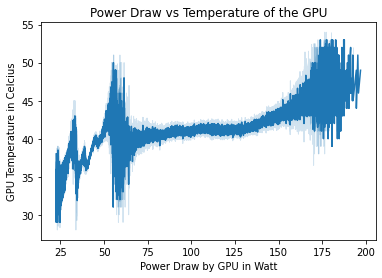

In [5]:
ax = sns.lineplot(data=gpu, x="powerDrawWatt", y="gpuTempC")
plt.xlabel('Power Draw by GPU in Watt')
plt.ylabel('GPU Temperature in Celcius')
plt.title("Power Draw vs Temperature of the GPU")
plt.show()

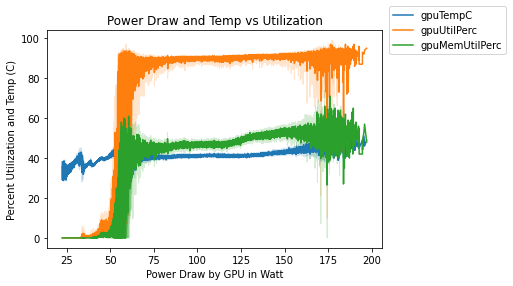

In [6]:
ax = sns.lineplot(data=pd.melt(gpu[["powerDrawWatt", "gpuTempC", "gpuUtilPerc", "gpuMemUtilPerc"]], 'powerDrawWatt'), x="powerDrawWatt", y="value", hue = "variable")
plt.xlabel('Power Draw by GPU in Watt')
plt.ylabel('Percent Utilization and Temp (C)')
plt.title("Power Draw and Temp vs Utilization")
plt.legend(bbox_to_anchor=(1.02, 1), fontsize='large', loc='center left', borderaxespad=0)
plt.show()

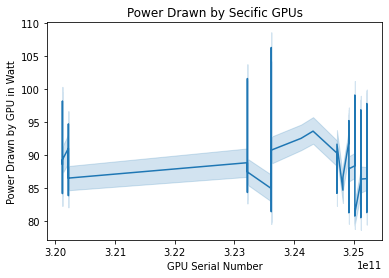

In [13]:
# ax = sns.lineplot(data = gpu, x = "gpuSerial", y = "powerDrawWatt")
ax = sns.lineplot(data = gpu, x = "gpuSerial", y = "powerDrawWatt")
plt.xlabel('GPU Serial Number')
plt.ylabel('Power Drawn by GPU in Watt')
plt.title('Power Drawn by Secific GPUs')
plt.show()